### Parsing and Baseline

**Importing Libraries**

In [328]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from scipy import sparse
import funcs
from skmultilearn.adapt import BRkNNaClassifier
from skmultilearn.adapt import MLkNN
import matplotlib.pyplot as plt

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier
import time

from sklearn.metrics import label_ranking_average_precision_score


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [315]:
data = pd.read_csv('../train.csv')
val = pd.read_csv('../dev.csv')

In [316]:
#Train formatting
x_train, y_train = funcs.data_format(data)
#Turns dicts into sparse matrices
x_train_s, y_train_s = funcs.sparsify(x_train, y_train)

In [318]:
#same for val
x_val, y_val = funcs.data_format(val)
x_val_s, y_val_s = funcs.sparsify(x_val, y_val)

In [321]:
pd.DataFrame.sparse.from_spmatrix(x_val_s)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.118379,0.346484,0.424367,0.195764,0.350030,0.212981,0.137765,0.145839,0.152305,0.309297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.084556,0.970155,0.471519,0.261019,0.350030,0.745434,0.275531,0.291678,1.675356,0.463946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.050734,1.524530,2.027533,0.652547,0.000000,5.005057,0.137765,0.583356,3.503017,0.618594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.118379,0.000000,0.235760,0.065255,0.262522,0.000000,0.000000,0.145839,0.609220,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.033823,0.103945,0.094304,0.195764,0.175015,0.745434,0.137765,0.145839,0.304610,0.618594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,0.236758,0.381132,0.282912,0.261019,0.700060,0.425962,0.137765,0.291678,1.218441,0.927891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1310,0.016911,0.415781,0.188608,0.065255,0.087507,0.000000,0.137765,0.583356,0.000000,0.463946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1311,0.033823,0.207890,0.047152,0.195764,0.350030,0.212981,0.137765,0.145839,1.066136,0.618594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1312,0.050734,0.207890,0.188608,0.130509,0.087507,0.638943,0.137765,0.583356,0.304610,0.463946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [341]:
classifier = BRkNNaClassifier(k=1)
classifier.fit(x_train_s, y_train_s)
predictions = classifier.predict(x_val_s)
label_ranking_average_precision_score(y_val_s.toarray(), predictions.toarray())
#classifier.score(x_val_s, y_val_s)

0.2724114346345276

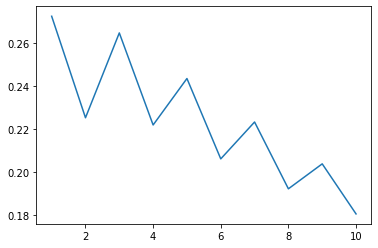

In [338]:
scores = []
ks =[1,2,3,4,5,6,7,8,9,10]
for k in ks:
    classifier = BRkNNaClassifier(k=k)
    classifier.fit(x_train_s, y_train_s)
    predictions = classifier.predict(x_val_s)
    scores.append(label_ranking_average_precision_score(y_val_s.toarray(), predictions.toarray()))
plt.plot(ks, scores)

In [327]:
start=time.time()
classifier = BinaryRelevance(
    classifier = RandomForestClassifier(),
    require_dense = [False, True]
)

classifier.fit(x_train_s, y_train_s)

print('training time taken: ',round(time.time()-start,0),'seconds')

training time taken:  5415.0 seconds


In [329]:
start=time.time()
y_hat = classifier.predict(x_val_s)
print('prediction time taken: ',round(time.time()-start,0),'seconds')

prediction time taken:  388.0 seconds


In [333]:
y_hat.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [332]:
label_ranking_average_precision_score(y_val_s.toarray(), y_hat.toarray())

0.19023742798627238